In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [65]:

np.random.seed(42)

In [84]:
#Training data
N_train = 10
X_train = np.random.uniform(size = N_train)
X_train = X_train.reshape((-1,1))
#print(X_train)
t_train = np.sin(2*math.pi*X_train) + np.random.normal(loc=0.0, scale=0.3,size = N_train).reshape((N_train,1))

In [85]:
#Test data
N_test = 100
X_test = np.random.uniform(size = N_test)
X_test = X_test.reshape((-1,1))
t_test = np.sin(2*math.pi*X_test) + np.random.normal(loc=0.0, scale=0.3,size=N_test).reshape((N_test,1))

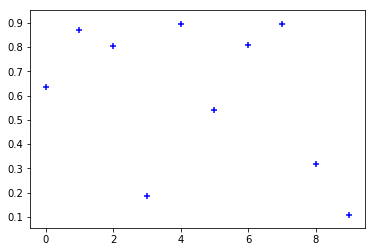

In [86]:
plt.scatter(range(0,N_train),X_train,c='b',marker='+')
#plt.scatter(range(0,N_test),X_test,c='r',marker='o')


In [90]:
def grad(W,X):
    return W.T.dot(X.T).dot(X) - t.values.T.dot(X)
def cost(W,X,t):
    inner = np.power(np.dot(X,W) - t), 2)
    return np.sum(inner)
#     c = np.abs(W.T.dot(X.T).dot(X).dot(W) - 2*t.T.dot(X).dot(W) + t.T.dot(t))
#     return c
def phi(X,order):
    if order == 0:
        return np.ones((X.shape[0],X.shape[1]))
    phi = np.ones((X.shape[0],1))
    for i in range(1,order+1):
        #print(phi.shape)
        #print(X.shape)
        phi = np.hstack([phi,X**i])
    return phi
    

SyntaxError: invalid syntax (<ipython-input-90-9fc8b967b5c2>, line 4)

In [92]:
train_cost = []
test_cost = []
for order in range(0,10):
    #print(order)
    d = phi(X_train,order)
    print(d)
    W = np.matmul(np.linalg.pinv(d),t_train)
    #print(cost(W,d,t_train))
    train_cost.append( math.sqrt(cost(W,d,t_train)/N_train))
    test_cost.append( math.sqrt(cost(W,phi(X_test,order),t_test)/N_test))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[1.         0.63340376]
 [1.         0.87146059]
 [1.         0.80367208]
 [1.         0.18657006]
 [1.         0.892559  ]
 [1.         0.53934224]
 [1.         0.80744016]
 [1.         0.8960913 ]
 [1.         0.31800347]
 [1.         0.11005192]]
[[1.         0.63340376 0.40120032]
 [1.         0.87146059 0.75944356]
 [1.         0.80367208 0.64588881]
 [1.         0.18657006 0.03480839]
 [1.         0.892559   0.79666157]
 [1.         0.53934224 0.29089005]
 [1.         0.80744016 0.6519596 ]
 [1.         0.8960913  0.80297962]
 [1.         0.31800347 0.10112621]
 [1.         0.11005192 0.01211143]]
[[1.         0.63340376 0.40120032 0.25412179]
 [1.         0.87146059 0.75944356 0.66182513]
 [1.         0.80367208 0.64588881 0.5190828 ]
 [1.         0.18657006 0.03480839 0.0064942 ]
 [1.         0.892559   0.79666157 0.71106745]
 [1.         0.53934224 0.29089005 0.15688929]
 [1.         0.80744016 0.6519596  0.52641836

In [93]:
print(train_cost)
print(test_cost)
print(W)

[0.783199106439197, 0.3632101409080741, 0.35894816272935753, 0.15586206739149802, 0.15456003679963223, 0.14764993032355253, 0.14624444318607635, 0.11928564038171127, 0.03953324730815964, 0.00014219098341563413]
[0.8302866449940492, 0.5547138752260798, 0.56192007960163, 0.3713704614809534, 0.39378861011137517, 0.5507554209273512, 0.4767372989626477, 3.4423562171096744, 350.3883224780052, 2676.7450027698683]
[[-1.86277792e+04]
 [ 4.76048939e+05]
 [-4.85103499e+06]
 [ 2.62449164e+07]
 [-8.43525181e+07]
 [ 1.69292262e+08]
 [-2.14491627e+08]
 [ 1.66870401e+08]
 [-7.28304533e+07]
 [ 1.36607319e+07]]


(0, 1)

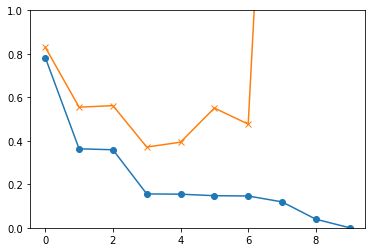

In [94]:
plt.plot(range(0,10),train_cost,marker='o')
plt.plot(range(0,10),test_cost,marker='x')
plt.ylim(0,1)

In [ ]:
# If error shoots up, try normalizing features or normalizing the errors